In [18]:
import numpy as np 
from sklearn.datasets import make_regression #génération de données aléatoires
import matplotlib.pyplot as plt #représentation des données dans des graphes

# 1.Dataset

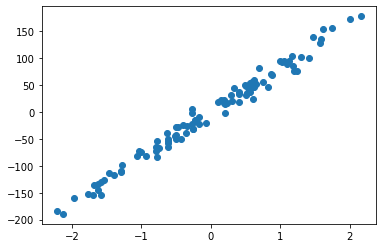

In [19]:
# génération de deux vecteurs x et y
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# représentation graphique de y en fonction de x
plt.scatter(x, y)

In [20]:
# dimenseion de la matrice x
print(x.shape)

# modification de la dimension y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [21]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [22]:
# initialisation de theta avec des nombres aléatoires
theta = np.random.randn(2, 1)
theta

array([[-0.62545971],
       [ 0.08755494]])

# 2.Modèle linéaire

In [23]:
#la fonction modèle
def modele(X, theta):
    return X.dot(theta)

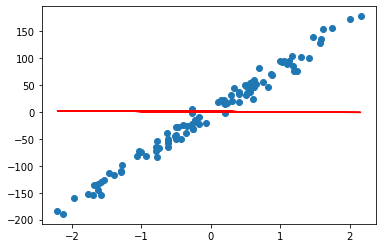

In [24]:
plt.scatter(x, y) #représenation des samples
plt.plot(x, modele(X, theta), c='r') # représentation du modèle 

# 3.Fonction coût (erreur quadratique moyenne)

In [25]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m))*np.sum((modele(X, theta)-y)**2)

In [26]:
cost_function(X, y, theta)

3600.8572274167354

# 4.Gradients et Descente de gradient

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(modele(X, theta) - y)

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    theta_history = np.zeros((n_iteration, 2))
    
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

# 5.Entrainement du modèle

In [43]:
learning_rate = 0.3
n_iteration=10
theta_final, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iteration)

In [44]:
theta_final
#cost_history
#theta_history.shape

(10, 2)

"\nici pour être proche au modele, il faut minimiser l'erreur, et il y a deux methodes à le faire:\n-> soit on augmente le nombre d'iterations, hors que ce n'est pas très prtique \n   parce qu'on fait marcher la machine pour des heures\n-> soit on augmente le pas d'apprentissage ou le learning rate\n"

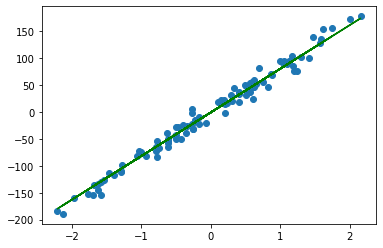

In [54]:
prediction = modele(X, theta_final)
plt.scatter(x, y) #représenation des samples
plt.plot(x, modele(X, theta_final), c='g')

#for i in range(n_iteration):
#    plt.plot(x, modele(X, theta_history[i])) # représentation du modèle prédit par rapport au temps 

'''
ici pour être proche au modele, il faut minimiser l'erreur, et il y a deux methodes à le faire:
-> soit on augmente le nombre d'iterations, hors que ce n'est pas très prtique 
   parce qu'on fait marcher la machine pour des heures
-> soit on augmente le pas d'apprentissage ou le learning rate
'''

# 6.Courbe d'apprentissage

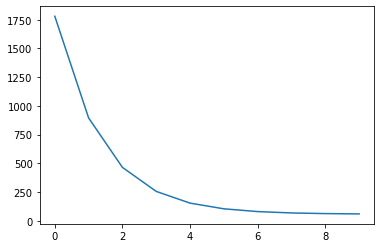

In [49]:
plt.plot(range(10), cost_history)

# 7.Coeficient de détermination

In [50]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [51]:
coef_determination(y, prediction) # pour valuer la perfomance de modèle de regression linéaire

0.9830071379705823